# SC51 Visualización del análisis descriptivo
---
**Reto: Autotransporte Federal de Turismo


# ⚙ Configuración

Importamos las librerias a utilizar

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Conectamos con gdrive para obtener los datos

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#2 Crear dataframes del archivo reto.csv
dfreto = pd.read_csv ("/content/gdrive/MyDrive/Colab Notebooks/Data12/reto.csv")
dfreto

,Meses,Autobuses,Personal,Pasajeros,Kilómetros
0,Enero,660,368,4156,12.042894
1,Febrero,733,423,4152,12.134195
2,Marzo,756,405,4140,13.358546
3,Abril,674,354,4173,11.744912
4,Mayo,744,395,4180,13.405438
5,Junio,757,382,4191,12.858895
6,Julio,726,363,4277,13.041197
7,Agosto,711,353,4329,13.780331
8,Septiembre,773,403,4315,13.804009
9,Octubre,788,401,4350,15.432687


In [ ]:
#2 Crear dataframes del archivo reto_3.csv
dfreto3 = pd.read_csv ("/content/gdrive/MyDrive/Colab Notebooks/Data12/reto_3.csv")
dfreto3

,Entidad,Clase,Automovil,Autobus,Camioneta
0,Aguscalientes,1,10,446,11
1,Baja California,2,15,314,20
2,Campeche,3,13,150,214
3,Cohahuila,4,5,200,9
4,Colima,5,8,367,2
5,Chiapas,6,200,280,24
6,Chihuahua,7,35,207,109
7,Distrito Federal,8,2,240,18
8,Durango,9,556,165,50
9,Guanajuato,10,300,178,118


# 📊 Gráficas  

3. Genera una gráfica para hallar la mediana de los autobuses que tienen las entidades.

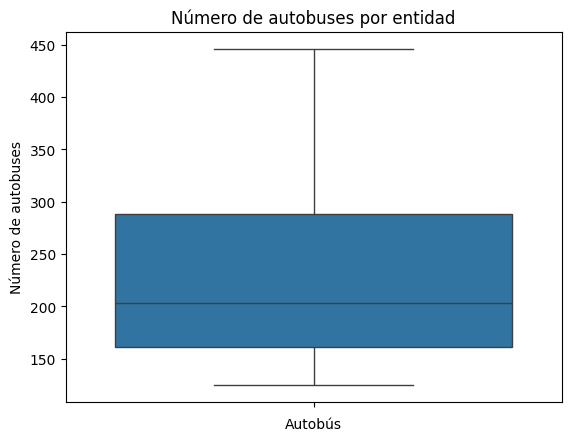

In [ ]:
#sns.boxplot(data=dfreto3, x='Entidad', y='Autobus')
sns.boxplot(dfreto3['Autobus'])
plt.title('Número de autobuses por entidad')
plt.xlabel('Autobús')
plt.ylabel('Número de autobuses')
plt.show()

4. Gráfica en 3 dimensiones donde relacionarás las variables Automóvil, Autobús, y camioneta.

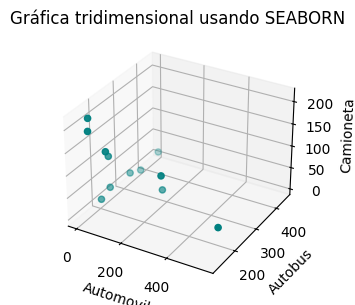

In [ ]:
# Graficar
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(dfreto3['Automovil'], dfreto3['Autobus'], dfreto3['Camioneta'], c='teal', marker='o')
ax.set_xlabel('Automovil')
ax.set_ylabel('Autobus')
ax.set_zlabel('Camioneta')
ax.set_title('Gráfica tridimensional usando SEABORN')
plt.tight_layout()
plt.show()

5. Gráfica residual de las 3 variables, automóvil (variable dependiente) junto con autobús y camioneta. Las dos últimas son las variables independientes.

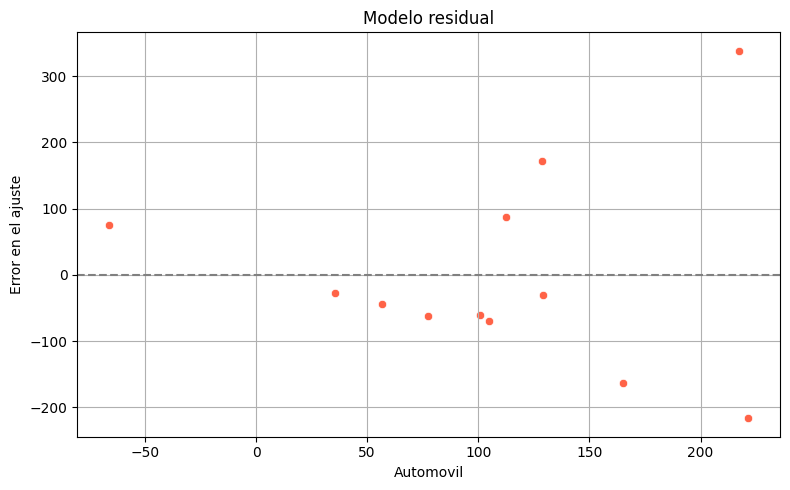

In [ ]:
#REVISAR TODO EL CÓDIGO

from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# Modelo de regresión lineal
y = dfreto3['Automovil'] # Select 'Automovil' as a DataFrame to keep it 2-dimensional
X = dfreto3[['Camioneta','Autobus']]
#X = dfreto3[['Camioneta','Autobus']]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
residuos = y - y_pred


# Gráfica residual
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuos, color="tomato") # Assuming you want to plot residuals for 'Automovil' prediction
plt.axhline(0, linestyle='--', color='gray')
plt.title('Modelo residual')
plt.xlabel('Automovil')
plt.ylabel('Error en el ajuste')
plt.grid(True)
plt.tight_layout()
plt.show()

6.	Indica si existe alguna relación de ajuste entre la variable automóvil y autobuses

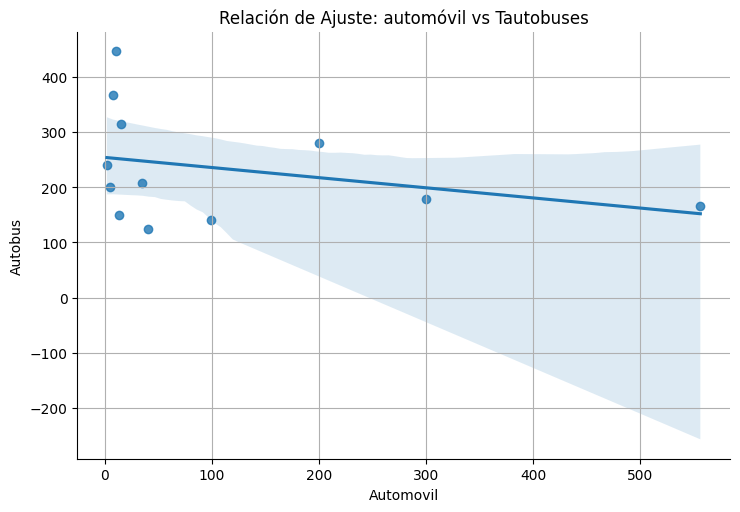

In [ ]:
sns.lmplot(data=dfreto3, x='Automovil', y='Autobus', ci=95, height=5, aspect=1.5)
plt.title('Relación de Ajuste: automóvil vs autobuses')
plt.xlabel('Automovil')
plt.ylabel('Autobus')
plt.grid(True)
plt.show()

7. Gráfica de kdeplot que muestre la relación entre los automóviles y el número de autobuses de las primeras 6 entidades.

In [ ]:
dfr6 = dfreto3.head(6)
dfr6

,Entidad,Clase,Automovil,Autobus,Camioneta
0,Aguscalientes,1,10,446,11
1,Baja California,2,15,314,20
2,Campeche,3,13,150,214
3,Cohahuila,4,5,200,9
4,Colima,5,8,367,2
5,Chiapas,6,200,280,24


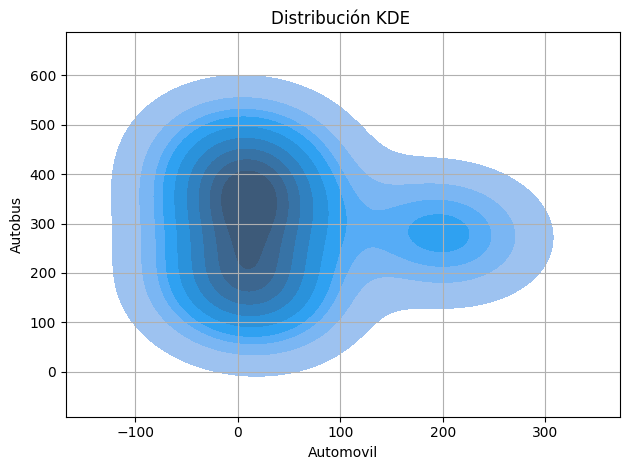

In [ ]:
# Crear KDEPlot
sns.kdeplot(data=dfr6, x='Automovil', y='Autobus', fill=True)

plt.title('Distribución KDE ')
plt.xlabel('Automovil')
plt.ylabel('Autobus')
plt.grid(True)
plt.tight_layout()
plt.show()

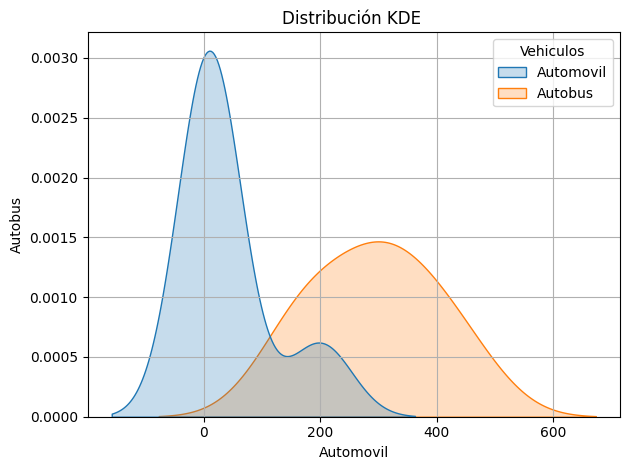

In [ ]:
dfr6 = dfreto3.head(6)
dfDatos = pd.DataFrame({
  'Vehiculos': np.repeat(['Automovil', 'Autobus'], 6),
  'Numero': pd.concat([dfr6['Automovil'], dfr6['Autobus']])
})
#dfDatos

# Crear KDEPlot
sns.kdeplot(data=dfDatos, x='Numero', hue='Vehiculos', fill=True)

plt.title('Distribución KDE ')
plt.xlabel('Automovil')
plt.ylabel('Autobus')
plt.grid(True)
plt.tight_layout()
plt.show()

8. Histograma que relacione el personal con el número de meses. Únicamente de enero a junio.

In [ ]:
dfrM6 = dfreto.head(6)[['Meses','Personal ']]
dfrM6.rename(columns={'Personal ': 'Personal'} ,inplace=True)
dfrM6

,Meses,Personal
0,Enero,368
1,Febrero,423
2,Marzo,405
3,Abril,354
4,Mayo,395
5,Junio,382


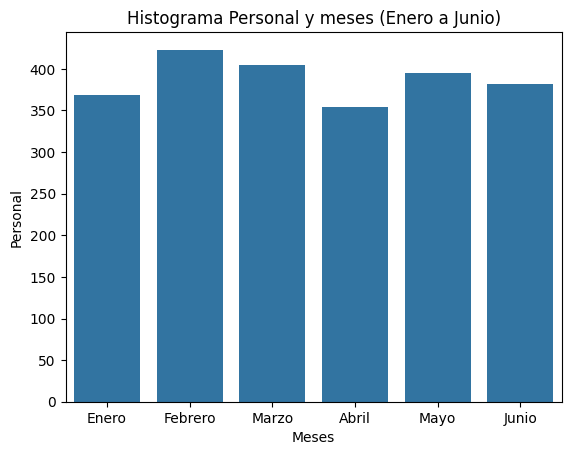

In [ ]:
sns.barplot(data=dfrM6, x="Meses", y="Personal")
plt.title('Histograma Personal y meses (Enero a Junio)')
plt.xlabel('Meses')
plt.ylabel('Personal')
plt.show()

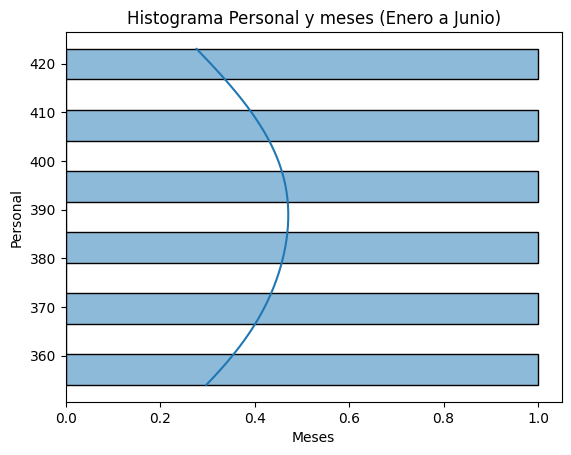

In [ ]:

# Histograma general
sns.histplot(data=dfrM6, y='Personal',kde=True, bins=11)
plt.title('Histograma Personal y meses (Enero a Junio)')
plt.xlabel('Meses')
plt.ylabel('Personal')
plt.show()

9. Gráfica de pastel que relacione los automóviles con las primeras 6 entidades de la tabla.

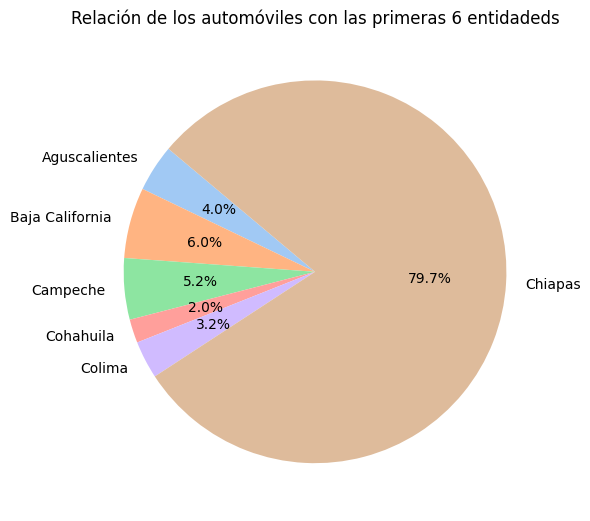

In [ ]:

# Crear gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(dfr6['Automovil'], labels=dfr6['Entidad'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Relación de los automóviles con las primeras 6 entidadeds')
plt.tight_layout()
plt.show()

10. Gráfica de dispersión para la relación entre automóvil vs autobús e indica qué tipo de relación tienen los datos independientes

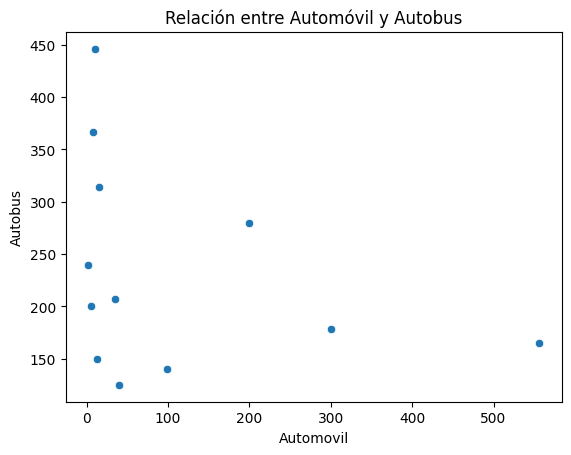

In [ ]:
# Crear scatter plot
sns.scatterplot(data=dfreto3, x='Automovil', y='Autobus')
plt.title('Relación entre Automóvil y Autobus')
plt.xlabel('Automovil')
plt.ylabel('Autobus')
plt.show()


In [ ]:
x = dfreto3['Automovil']
y = dfreto3['Autobus']
x_mean = np.mean(x)
y_mean = np.mean(y)
numerador = np.sum((x - x_mean) * (y - y_mean))
denominador = np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))
r = numerador / denominador

'Coeficiente de correlación de Pearson: {r:.4f}'

'Coeficiente de correlación de Pearson: {r:.4f}'

# **Interpreación:**
Tipo de correlación entre el automóvil y el autobus negativa, cuando aumenta el número de automoviles disminuye el de autobuses, aunque la correlación tambien es débil, ya que el coeficiente de correlación es de -0.31.

# ☝ Ejemplos

---

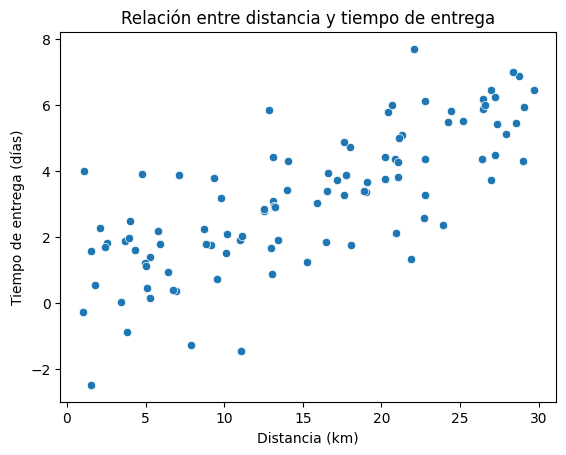

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Semilla para reproducibilidad
np.random.seed(1)
n = 100

# Crear los datos
distancia_km = np.random.uniform(1, 30, size=n)
tiempo_entrega = 0.2 * distancia_km + np.random.normal(0, 1.5, size=n)

# Crear DataFrame
datos = pd.DataFrame({
    'distancia_km': distancia_km,
    'tiempo_entrega': tiempo_entrega
})

# Crear scatter plot
sns.scatterplot(data=datos, x='distancia_km', y='tiempo_entrega')
plt.title('Relación entre distancia y tiempo de entrega')
plt.xlabel('Distancia (km)')
plt.ylabel('Tiempo de entrega (días)')
plt.show()




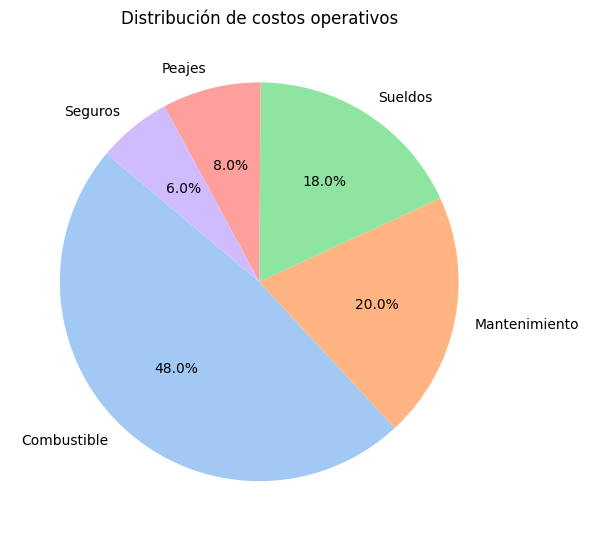

In [ ]:


import matplotlib.pyplot as plt

# Datos de ejemplo
categorias = ['Combustible', 'Mantenimiento', 'Sueldos', 'Peajes', 'Seguros']
costos = [48, 20, 18, 8, 6]

# Crear gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(costos, labels=categorias, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribución de costos operativos')
plt.tight_layout()
plt.show()

In [ ]:
# Simulación de datos
np.random.seed(0)
entregas = pd.DataFrame({
    'zona': np.random.choice(['Norte', 'Centro', 'Sur'], size=150),
    'dias_entrega': np.concatenate([
        np.random.normal(2, 0.5, 50),  # Norte
        np.random.normal(3, 1.0, 50),  # Centro
        np.random.normal(4, 1.2, 50)   # Sur
    ])
})
entregas

,zona,dias_entrega
0,Norte,2.138498
1,Centro,2.394834
2,Norte,2.161037
3,Centro,2.350196
4,Centro,2.194358
...,...,...
145,Centro,4.561081
146,Norte,2.178366
147,Norte,1.728346
148,Norte,3.057896


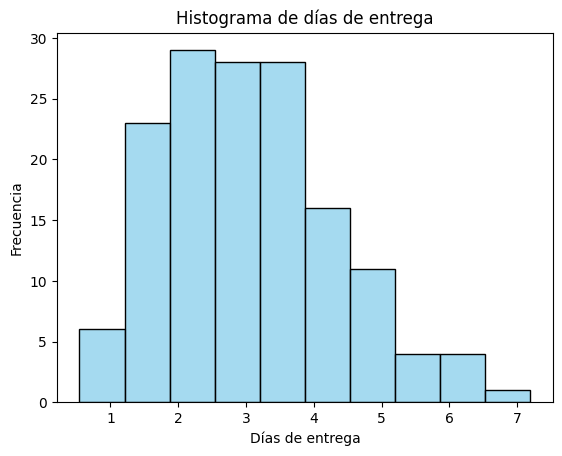

In [ ]:



import seaborn as sns
import matplotlib.pyplot as plt

# Histograma general
sns.histplot(data=entregas, x='dias_entrega', bins=10, kde=False, color='skyblue')
plt.title('Histograma de días de entrega')
plt.xlabel('Días de entrega')
plt.ylabel('Frecuencia')
plt.show()



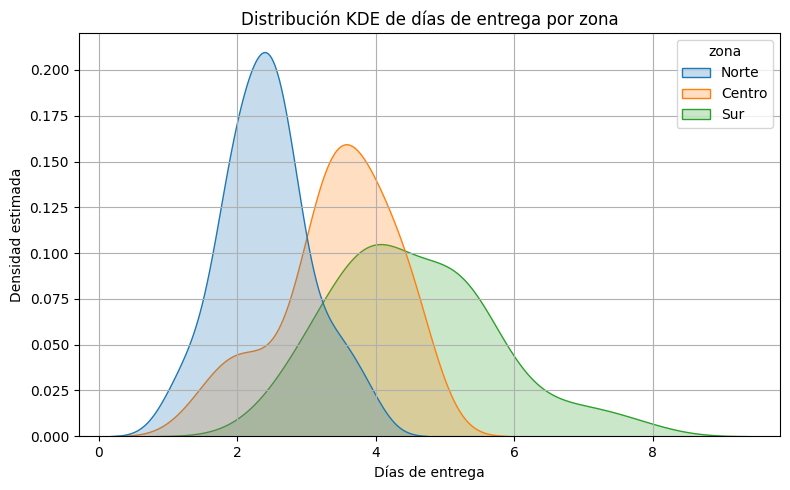

In [ ]:
# Simular datos
np.random.seed(2)
n = 150
entregas = pd.DataFrame({
    'zona': np.repeat(['Norte', 'Centro', 'Sur'], 50),
    'dias_entrega': np.concatenate([
        np.random.normal(2.5, 0.6, 50),   # Norte
        np.random.normal(3.5, 0.8, 50),   # Centro
        np.random.normal(4.5, 1.0, 50)    # Sur
    ])
})
#entregas

# Crear KDEPlot
plt.figure(figsize=(8, 5))
sns.kdeplot(data=entregas, x='dias_entrega', hue='zona', fill=True)
plt.title('Distribución KDE de días de entrega por zona')
plt.xlabel('Días de entrega')
plt.ylabel('Densidad estimada')
plt.grid(True)
plt.tight_layout()
plt.show()

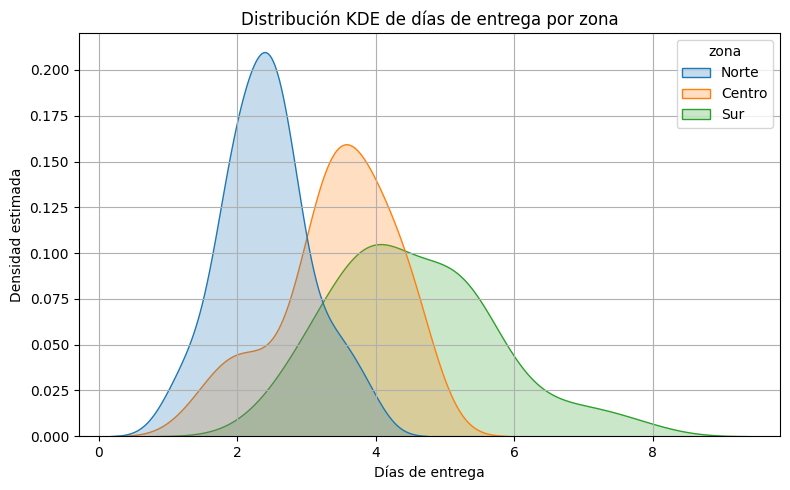

In [ ]:


# Crear KDEPlot
plt.figure(figsize=(8, 5))
sns.kdeplot(data=entregas, x='dias_entrega', hue='zona', fill=True)
plt.title('Distribución KDE de días de entrega por zona')
plt.xlabel('Días de entrega')
plt.ylabel('Densidad estimada')
plt.grid(True)
plt.tight_layout()
plt.show()


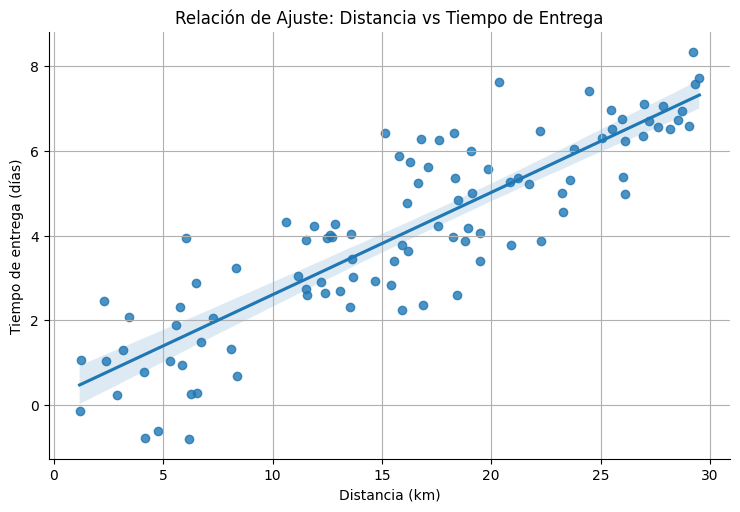

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Simular datos
np.random.seed(4)
n = 100
distancia_km = np.random.uniform(1, 30, size=n)
tiempo_entrega = 0.25 * distancia_km + np.random.normal(0, 1.2, size=n)

df_reg = pd.DataFrame({
    'distancia_km': distancia_km,
    'tiempo_entrega': tiempo_entrega
})

# Gráfico de regresión
sns.lmplot(data=df_reg, x='distancia_km', y='tiempo_entrega', ci=95, height=5, aspect=1.5)
plt.title('Relación de Ajuste: Distancia vs Tiempo de Entrega')
plt.xlabel('Distancia (km)')
plt.ylabel('Tiempo de entrega (días)')
plt.grid(True)
plt.show()


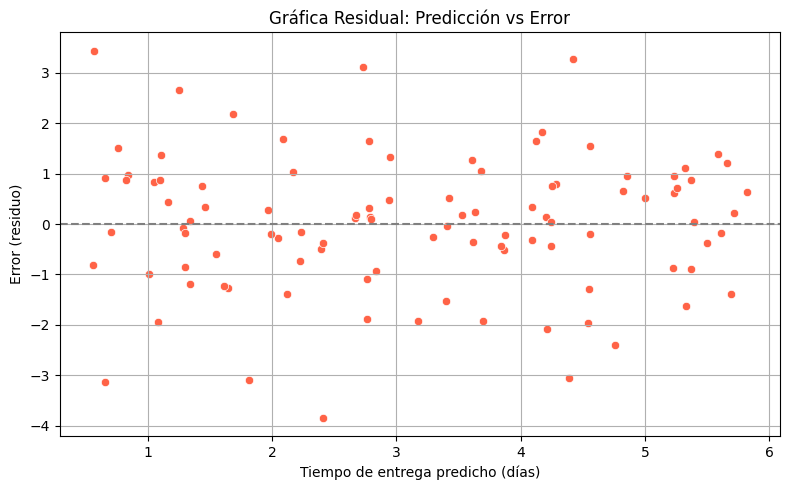

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Datos simulados
np.random.seed(1)
n = 100
distancia_km = np.random.uniform(1, 30, size=n)
tiempo_real = 0.2 * distancia_km + np.random.normal(0, 1.5, size=n)

# Modelo de regresión lineal
X = distancia_km.reshape(-1, 1)
y = tiempo_real
modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
residuos = y - y_pred

# Gráfica residual
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuos, color="tomato")
plt.axhline(0, linestyle='--', color='gray')
plt.title('Gráfica Residual: Predicción vs Error')
plt.xlabel('Tiempo de entrega predicho (días)')
plt.ylabel('Error (residuo)')
plt.grid(True)
plt.tight_layout()
plt.show()